<a href="https://colab.research.google.com/github/johancamilo/Bloove/blob/master/Proyecto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [155]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm
import seaborn as sns



In [158]:
!rm -rf data/
!rm -rf data.z*
!drm -rf mlutils.p*
!mkdir -p data/
!cd data/
!wget https://raw.githubusercontent.com/johancamilo/johan/master/googleplaystore.csv -P data/
!ls

/bin/bash: drm: command not found
--2021-10-23 07:47:08--  https://raw.githubusercontent.com/johancamilo/johan/master/googleplaystore.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1360155 (1.3M) [text/plain]
Saving to: ‘data/googleplaystore.csv’

googleplaystore.csv 100%[===================>]   1.30M  --.-KB/s    in 0.06s   

2021-10-23 07:47:09 (23.1 MB/s) - ‘data/googleplaystore.csv’ saved [1360155/1360155]

data  sample_data


In [ ]:
playstoredata = pd.read_csv('data/googleplaystore.csv')
playstoredata.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
playstoredata.shape

(10841, 13)

In [ ]:
datagoogleindex=np.array(playstoredata.keys())

In [ ]:
lnumber=len(datagoogleindex)
lnumber

13

In [ ]:
countratingmin2 = playstoredata[playstoredata['Rating']>5]

Eliminamos la fila 10472 ya que nos genera un error a la hora de convertir la columna en entero.

In [ ]:
playstoredata.drop([10472], inplace=True)

Vamos a reemplazar los espacios de las columans de la tabla por un " _ " para poder llamar dichos campos a continuacion.

In [ ]:
playstoredata.columns = playstoredata.columns.str.replace(' ','_')

In [ ]:
countratingmin3 = playstoredata[playstoredata['Reviews'].astype(int)>39158306]

In [ ]:
countratingmin3.shape

(17, 13)

X es el rating que tuvo cada aplicacion y Y es el conteo de cada rating que hubo despues de 39158306 criticas o reviews

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f795286e2d0>]],
      dtype=object)

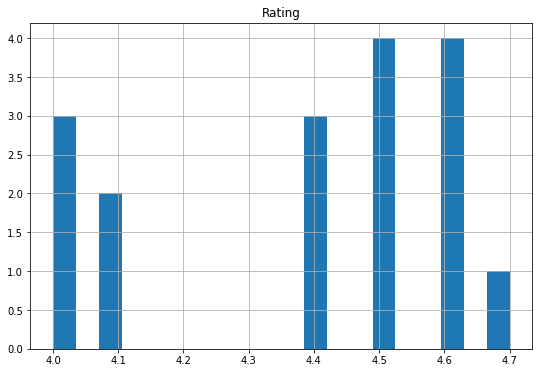

In [ ]:
pd.DataFrame.hist(countratingmin3, figsize=(9,6), bins=20) 

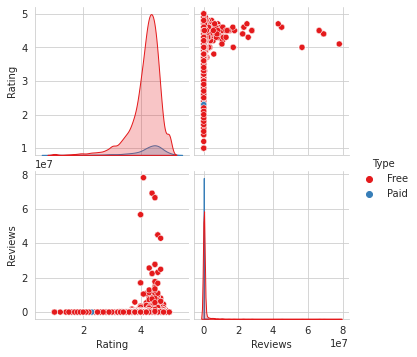

In [165]:
Rating = playstoredata['Rating']
Type = playstoredata['Type']

plotgraph = sns.pairplot(pd.DataFrame(list(zip(Rating, playstoredata['Reviews'].astype(int), Type)), 
                        columns=['Rating', 'Reviews',  'Type']), hue='Type', palette="Set1")